In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='time'>

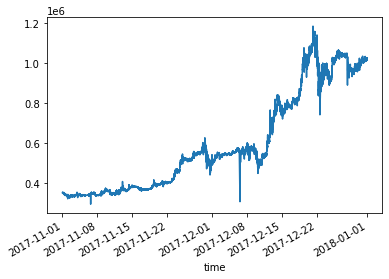

In [2]:
# 데이터 경로
DATA_PATH = '/aiffel/aiffel/fnguide/data/'

# 데이터 불러오기
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)

# 불러온 데이터 시각화하기
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

# ① Price Change Direction 적용하기

In [3]:
# Q. 코드를 작성해주세요

# window 지정
window = 10 #[[YOUR CODE]] 
# 앞서 사용한 window의 값은 10입니다.

# momentum_signal 만들기
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1) #[[YOUR CODE]]
# modify_data['close'].shift(window)활용

# s_momentum_signal 만들기
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index) # 데이터 활용을 위해 pd.Series를 사용합니다.

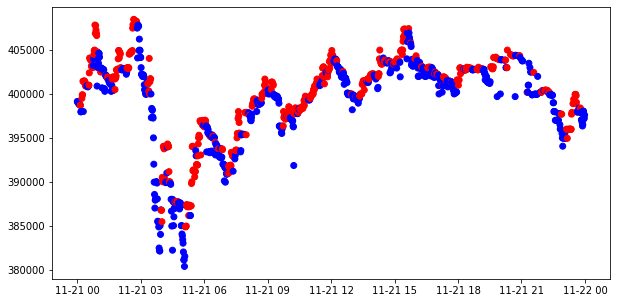

In [4]:
# Q. 코드를 작성해주세요

# 기존 데이터 만들기
sub_data = modify_data.loc['2017-11-21', 'close'] #[[YOUR CODE]] 
# loc를 활용하여 2017-11-21부터 close(종가)까지 가져오기

# 수식 적용된 데이터 만들기
c_sig = s_momentum_signal.loc['2017-11-21'] #[[YOUR CODE]] 
# loc를 활용하여 2017-11-21의 시간대별 값을 가져오기

# 두 데이터의 비교를 위한 색상 바꾸기
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue') #[[YOUR CODE]] 
# np.where 사용

# 시각화하기
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color']) #[[YOUR CODE]]

# ② Using Moving Average 적용하기

In [5]:
# Q. 코드를 작성해주세요

# momentum_signal 
momentum_signal =  np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1) #[[YOUR CODE]]
# modify_data['close'].rolling(window).mean() 활용

# s_momentum_signal
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index) #[[YOUR CODE]] # pd.Series로 변환

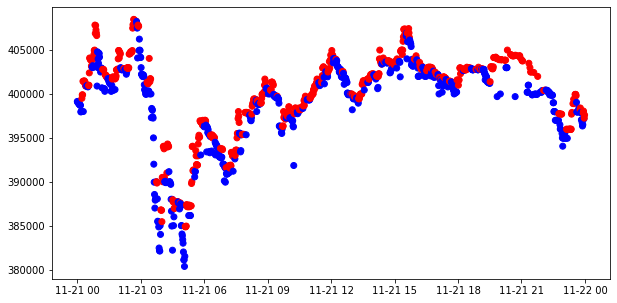

In [6]:
# Q. 코드를 작성해주세요

# 기존 데이터 만들기
sub_data = modify_data.loc['2017-11-21', 'close'] #[[YOUR CODE]]

# 수식 적용된 데이터 만들기
c_sig = s_momentum_signal.loc['2017-11-21'] #[[YOUR CODE]]

# 두 데이터의 비교를 위한 색상 바꾸기
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue') #[[YOUR CODE]]

# 시각화하기
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color']) #[[YOUR CODE]]

# ③ Local Min-Max 적용하기

In [7]:
# Q. 코드를 작성해주세요

# Local min / max 를 추출하기 위한 함수
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0] #[[YOUR CODE]] # ①
    n_cnt_min, n_cnt_max = 0, 0
    
    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False
    
    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val # [[YOUR CODE]] # ②
            maxes.append(max_value) # [[YOUR CODE]]  # ③
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True # [[YOUR CODE]] # ④
        
        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0
    
        if not b_min_update:
            b_max_update = False # [[YOUR CODE]] # ⑤
            n_cnt_max += 1 # [[YOUR CODE]] # ⑥
            if n_cnt_max >= wait:
                min_value = max_value # [[YOUR CODE]] # ⑦
                n_cnt_max = 0
               
    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes}) # [[YOUR CODE]] # ⑧

In [8]:
# Local mins, maxes를 확인
mins, maxes = get_local_min_max(sub_data, wait=3)

# mins, maxes 확인 
print(mins)
print('--'*20)
print(maxes)

               min_time  local_min
0   2017-11-21 00:01:00     399050
1   2017-11-21 00:03:00     399000
2   2017-11-21 00:04:00     398900
3   2017-11-21 00:05:00     398850
4   2017-11-21 00:06:00     398800
..                  ...        ...
472 2017-11-21 23:48:00     397850
473 2017-11-21 23:50:00     397050
474 2017-11-21 23:52:00     396750
475 2017-11-21 23:53:00     396350
476 2017-11-21 23:59:00     397600

[477 rows x 2 columns]
----------------------------------------
               max_time  local_max
0   2017-11-21 00:13:00     399500
1   2017-11-21 00:14:00     399900
2   2017-11-21 00:16:00     401450
3   2017-11-21 00:19:00     401350
4   2017-11-21 00:20:00     401500
..                  ...        ...
268 2017-11-21 23:41:00     398050
269 2017-11-21 23:43:00     398400
270 2017-11-21 23:46:00     398200
271 2017-11-21 23:47:00     398400
272 2017-11-21 23:56:00     398050

[273 rows x 2 columns]


(376546.5, 412585.0)

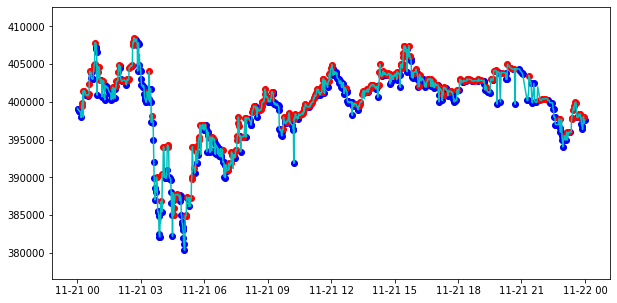

In [9]:
# Q. 코드를 작성해주세요

# subplots 및 plot 생성
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) #[[YOUR CODE]]
ax.plot(sub_data, 'c')

# min_time, local_min을 활용한 scatter plot 생성
ax.scatter(mins.min_time, mins.local_min, c='blue') #[[YOUR CODE]]

# maxes_time, local_max를 활용한 scatter plot 생성
ax.scatter(maxes.max_time, maxes.local_max, c='red') #[[YOUR CODE]]

# y축 설정
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

# ④ Trend Scanning 적용하기

In [10]:
def t_val_lin_r(close):
    import statsmodels.api as sml
    
    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit() 
    return ols.tvalues[1]

In [11]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [12]:
# Q. 코드를 작성해주세요

# 이 코드 블럭은 실행에 20-30분정도가 소요될 수 있습니다.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # 전방 탐색을 위한 샘플 추출
    if look_forward_window > subset.shape[0]:
        continue
    
    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # 회귀분석을 통해 t 통계량값을 이용하여 추세 추정
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values)) #[[YOUR CODE]] # t-value 사용
    
    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out) #[[YOUR CODE]] # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|██████████| 33384/33384 [17:29<00:00, 31.81it/s]


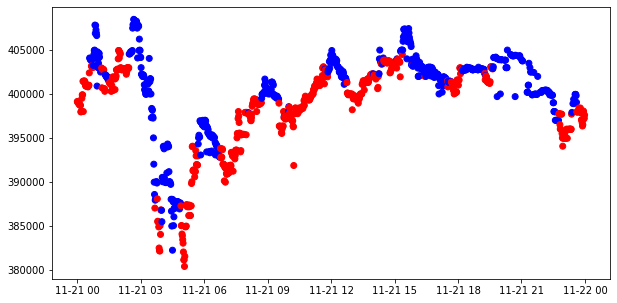

In [13]:
# 시각화
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

# 2. 프로젝트 : Feature Engineering



# ① 환경구성 및 데이터 불러오기

In [14]:
# !pip install ta==0.9.0
# !pip install shap

In [15]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
sys.path.append('/aiffel/aiffel/fnguide/data/')
from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
# 데이터 경로 설정
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# 데이터 불러오기
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

# ② Technical Index 적용하기

In [17]:
# 기술적 지표를 적용합니다.

mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [18]:
# 수익률 / 변동성 지표를 적용합니다.
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [19]:
# Q. 코드를 작성해주세요

df_tmp_data = df_.join(df_label_data).dropna()

# X, y 데이터셋 만들기
X = df_tmp_data.iloc[:, 5:-1] 
y = df_tmp_data.iloc[:, -1] #[[YOUR CODE]] # iloc[:, -1] 사용

# StandardScaler 적용
sc = StandardScaler() #[[YOUR CODE]]

# fit_transform 사용
X_sc = sc.fit_transform(X) #[[YOUR CODE]]

# DataFrame 변환
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [20]:
# Q. 코드를 작성해주세요

# RandomForest 모델 적용
rfc = RandomForestClassifier(class_weight='balanced') #[[YOUR CODE]]

# RandomForest fit 하기
rfc.fit(X_sc, y) #[[YOUR CODE]]

RandomForestClassifier(class_weight='balanced')

# ③ Feature Selection methods 적용하기

## MDI, Mean Decrease Impurity

In [21]:
# MDI, Mean Decrease Impurity 
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

,mean,std
volume_cmf,0.045249,0.002096
volume_fi,0.041233,0.002301
volume_mfi,0.046047,0.002414
volume_sma_em,0.033676,0.001753
volume_vpt,0.026922,0.001459
volatility_atr,0.075752,0.002963
volatility_ui,0.047205,0.002424
trend_macd_diff,0.074926,0.004119
trend_adx,0.052815,0.002488
trend_trix,0.071369,0.003107


## MDA, Mean Decrease Accuracy

In [23]:
# MDA, Mean Decrease Accuracy
# Tree 및 Support Vector Machine 외에 다른 분류기(classifier)를 사용을 위해서 XGBoost 사용
import xgboost as xgb
xgb_rbf = xgb.XGBClassifier(kernel='rbf', probability=True) 
cv = KFold(n_splits=3) # n_splits을 변경해봅시다.
feat_imp_mda = imp.mean_decrease_accuracy(xgb_rbf, X_sc, y, cv_gen=cv)

[06:39:18] WARNING: ../src/learner.cc:573: 
Parameters: { "kernel", "probability" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:39:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:39:19] WARNING: ../src/learner.cc:573: 
Parameters: { "kernel", "probability" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:39:19] WARNING: ../src/learner.cc:1095: Starting in XGBoo

In [24]:
# plot_feature_importance 함수 만들기
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path) 
    else:
        plt.show()

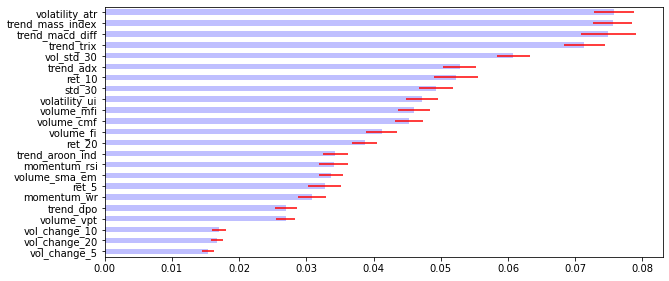

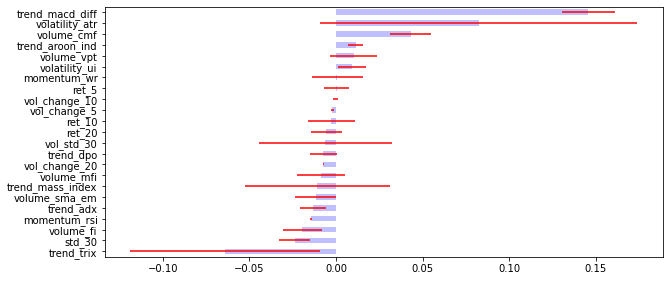

In [25]:
# Q. 코드를 작성해주세요

# feat_imp 확인
plot_feature_importance(feat_imp) #[[YOUR CODE]]

# feat_imp_mda 확인
plot_feature_importance(feat_imp_mda) #[[YOUR CODE]]

## RFE CV, Recursive Feature Elimination

In [27]:
# Q. 코드를 작성해주세요

# RFE CV, Recursive Feature Elimination
xgb_rbf = xgb.XGBClassifier(kernel='linear', probability=True) 
rfe_cv = RFECV(xgb_rbf, cv=cv) #[[YOUR CODE]] # RFECV
rfe_fitted = rfe_cv.fit(X_sc, y) #[[YOUR CODE]] # fit

[06:41:28] WARNING: ../src/learner.cc:573: 
Parameters: { "kernel", "probability" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:41:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:41:28] WARNING: ../src/learner.cc:573: 
Parameters: { "kernel", "probability" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:41:28] WARNING: ../src/learner.cc:1095: Starting in XGBoo

In [28]:
# 선택된 피쳐 확인하기

rfe_df = pd.DataFrame([rfe_fitted.support_, rfe_fitted.ranking_], columns=X_sc.columns).T.rename(columns={0:"Optimal_Features", 1:"Ranking"})
rfe_df # [[Your Code]]

,Optimal_Features,Ranking
volume_cmf,True,1
volume_fi,True,1
volume_mfi,True,1
volume_sma_em,False,2
volume_vpt,False,6
volatility_atr,True,1
volatility_ui,True,1
trend_macd_diff,True,1
trend_adx,True,1
trend_trix,True,1


In [29]:
rfe_df[rfe_df["Optimal_Features"]==True]

,Optimal_Features,Ranking
volume_cmf,True,1
volume_fi,True,1
volume_mfi,True,1
volatility_atr,True,1
volatility_ui,True,1
trend_macd_diff,True,1
trend_adx,True,1
trend_trix,True,1
trend_mass_index,True,1
trend_aroon_ind,True,1


## SFS, Sequential Feature Selection

In [30]:
# SFS, Sequential Feature Selection

n = 2 #[Your Code]
sfs_forward = SequentialFeatureSelector(xgb_rbf, n_features_to_select=n, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

[06:43:52] WARNING: ../src/learner.cc:573: 
Parameters: { "kernel", "probability" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:43:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:43:53] WARNING: ../src/learner.cc:573: 
Parameters: { "kernel", "probability" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:43:53] WARNING: ../src/learner.cc:1095: Starting in XGBoo

In [31]:
# 선택된 피쳐 확인하기

sfs_rank = sfs_fitted.get_support()
sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns={"Optimal_Features"})

sfs_df [sfs_df ["Optimal_Features"]==True].index # [[Your Code]]

Index(['ret_10', 'ret_20'], dtype='object')

## SHAP, Shapley Additive explanations

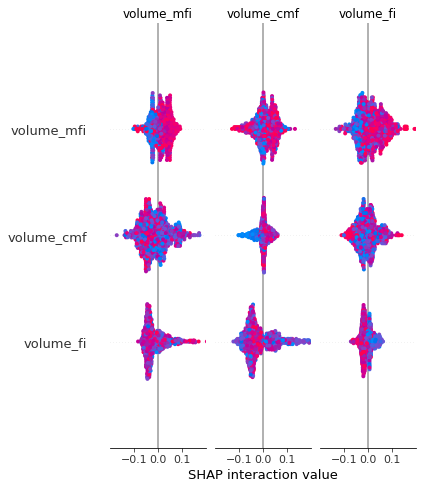

In [32]:
# Q. 코드를 작성해주세요

# SHAP, Shapley Additive explanations
import shap
explainer = shap.TreeExplainer(rfc)
shap_value = explainer.shap_values(X_sc)

# shap_value, X_sc 사용 shap.summary_plot 그리기
shap.summary_plot(shap_value, X_sc) #[[YOUR CODE]]

# 3. 프로젝트 : Model Traning


# ① 환경구성 및 데이터 불러오기

In [33]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

sys.path.append('/aiffel/aiffel/fnguide/data/')
from libs.mlutil.pkfold import PKFold

In [44]:
# 데이터 경로 설정 및 pickle 파일 불러오기
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')


# 여기서부터 모델에 적용하기 위한 데이터 정제화를 시작합니다.
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)
df_data['t_value'].value_counts()

# 데이터셋 비율 나누기
train_ratio, test_ratio = 0.6, 0.3
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 데이터셋 분리
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1500] # 데이터셋을 증가 혹은 감소시켜 결과를 비교해봅시다.
train_y = train_y[:1500]

# ② Purged K-fold for Cross-Validation적용하기

In [45]:
# Q. 코드를 작성해주세요

n_cv = 2 #[[YOUR CODE]] # 앞에서 지정한 값은 4입니다. 

# 얼마를 넣을지 생각해보고 왜 이 값을 넣었는지에 대해서 설명해봅시다.
'''-> 이유: Cross_Validation교차검증은 학습시 과적합을 막기 위한 하나의 방법으로 데이터를 K개의 부분집합으로 나누어, 
K-1개의 부분집합으로 학습을 진행하고, 나머지 하나의 부분집합으로 검증을 진행하기 위해서'''

t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold 
cv = PKFold(n_cv, t1, 0) #[[YOUR CODE]]

# ③ Model 적용하기

In [46]:
# GridsearchCV에서 사용할 파라미터 설정합니다. 파라미터값을 바꿔보세요
bc_params = {'n_estimators': [5, 10,15, 20],
             'max_features': [0.5, 0.7, 0.9],
             'base_estimator__max_depth': [3,5,10,15,20],
             'base_estimator__max_features': [None, 'auto'],
             'base_estimator__min_samples_leaf': [3, 5, 10, 15],
             'bootstrap_features': [False, True]
            }

In [47]:
# RandomForest 사용
rfc = RandomForestClassifier(class_weight='balanced')

In [48]:
# Q. 코드를 작성해주세요

# Bagging 적용
bag_rfc = BaggingClassifier(rfc) #[[YOUR CODE]]

In [49]:
# Q. 코드를 작성해주세요

# GridSearchCV 적용
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1) #[[YOUR CODE]]

In [50]:
# fit
gs_rfc.fit(train_x, train_y)

# best estimator 
gs_rfc_best = gs_rfc.best_estimator_

Fitting 2 folds for each of 960 candidates, totalling 1920 fits


In [51]:
gs_rfc_best.fit(train_x, train_y)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=3,
                                                        max_features=None,
                                                        min_samples_leaf=15),
                  max_features=0.5, n_estimators=5)

In [52]:
# 예측값 확인
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [56]:
# Q. 코드를 작성해주세요

# test_y, pred_y를 활용한 지표 적용
confusion = confusion_matrix(test_y, pred_y) #[[YOUR CODE]] 
accuracy  = accuracy_score(test_y, pred_y) #[[YOUR CODE]] 
precision = precision_score(test_y, pred_y) #[[YOUR CODE]] 
recall    = recall_score(test_y, pred_y) #[[YOUR CODE]] 

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')


# <실험 1>
# # 데이터셋 비율 나누기
# train_ratio, test_ratio = 0.7, 0.2

# # 데이터셋 갯수
# train_x = train_x[:1500] 
# train_y = train_y[:1500]

# # bc_params = {'n_estimators': [5, 10, 20],
#              'max_features': [0.5, 0.7],
#              'base_estimator__max_depth': [3,5,10, 20],
#              'base_estimator__max_features': [None, 'auto'],
#              'base_estimator__min_samples_leaf': [3, 5, 10,],
#              'bootstrap_features': [False, True]
#             }

# # BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
#                                                         max_depth=10,
#                                                         max_features=None,
#                                                         min_samples_leaf=10),
#                                                         max_features=0.7, n_estimators=5)
# -★결과★- (이전과 동일)
# ================= confusion matrix ====================
# [[81 55]
#  [14 41]]
# =======================================================
# 정확도:0.6387434554973822, 정밀도:0.4270833333333333, 재현율:0.7454545454545455

# ------------------------------------------------------------------------------------------------------------------------------------

# <실험2>
# # 데이터셋 비율 나누기
# train_ratio, test_ratio = 0.6, 0.3

# # 데이터셋 갯수
# train_x = train_x[:1500] 
# train_y = train_y[:1500]

# # bc_params = {'n_estimators': [5, 10,15, 20],
#              'max_features': [0.5, 0.7, 0.9],
#              'base_estimator__max_depth': [3,5,10,15, 20],
#              'base_estimator__max_features': [None, 'auto'],
#              'base_estimator__min_samples_leaf': [3, 5, 10, 15],
#              'bootstrap_features': [False, True]
#             }
# # BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
#                                                         max_depth=3,
#                                                         max_features=None,
#                                                         min_samples_leaf=15),
#                                                         max_features=0.5, n_estimators=5)
# -★결과★-
# ================= confusion matrix ====================
# [[117  67]
#  [ 30  73]]
# =======================================================
# 정확도:0.662020905923345, 정밀도:0.5214285714285715, 재현율:0.7087378640776699 -> ★★★ 정확도:0.025, 정밀도:0.94 높아짐★★★


================= confusion matrix ====================
[[117  67]
 [ 30  73]]
정확도:0.662020905923345, 정밀도:0.5214285714285715, 재현율:0.7087378640776699


auc:0.6723037146475307


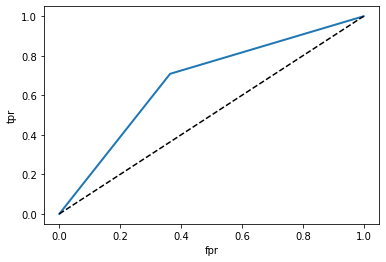

In [57]:
# Q. 코드를 작성해주세요

# ROC curve 만들기
fpr, tpr, thresholds = roc_curve(test_y, pred_y) #[[YOUR CODE]]
auc = roc_auc_score(test_y, pred_y) #[[YOUR CODE]]

# ROC curve 시각화
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

# ★★★ <실험2>로 진행한 결과 auc도 0.0018 높아짐★★★